# Chap02 - 자연어와 단어의 분산 표현

## 2.1 자연어 처리란

- 한국어와 영어 등 우리가 평소에 쓰는 말을 **자연어**(natural language)라고 한다.

- 자연어처리(**NLP**, Natural Language Processing)은 '우리의 말을 컴퓨터에게 이해시키기 위한 기술(분야)'를 의미한다.

## 2.2 시소러스(Thesaurus)

- 시소러스는 유의어 사전으로, '뜻이 같은 단어(동의어)'나 '뜻이 비슷한 단어(유의어)'가 한 그룹으로 분류되어 있다.

- 대표적인 시소러스로는 'WordNet'이 있다.

### 시소러스 문제점

- 시대 변화에 대응하기 어렵다.
    - 신조어, 단어의 의미 변화 등
    
    
- 사람을 쓰는 비용이 크다.

- 단어의 미묘한 차이를 표헌할 수 없다.

## 2.3 통계 기반 기법

- **말뭉치(corpus)** : 대량의 텍스트 데이터를 의미하며, NLP나 애플리케이션을 염두에 두고 수집된 텍스트 데이터를 말한다.

- 통계 기반 기법의 목표는 말뭉치(corpus)에서 자동으로, 그리고 효율적으로 핵심을 추출하는 것이다.

### 2.3.1 파이썬으로 말뭉치 전처리하기

In [1]:
text = 'You say goodbye and I say hello.'

text = text.lower()
text = text.replace('.', ' .')
text

'you say goodbye and i say hello .'

In [2]:
words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

- 단어에 ID를 부여하고, ID의 리스트로 이용할 수 있도록 해준다.

- 딕셔너리를 이용해 단어 ID와 단어를 매핑한다.

In [6]:
word_to_id = {}

for word in words:
    if word not in word_to_id:
        new_id =  len(word_to_id)
        word_to_id[word] = new_id
        
id_to_word = {id_: word for word, id_ in word_to_id.items()}

In [7]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [8]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

- 위의 딕셔너리를 사용해, 단어 ID를 검색하거나, 반대로 단어 ID를 가지고 단어를 검색할 수 있다.

In [9]:
id_to_word[1]

'say'

In [11]:
word_to_id['hello']

5

In [12]:
# 단어 목록 -> 단어 ID 목록으로 변경
import numpy as np

corpus = [word_to_id[word] for word in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [14]:
# common/util.py -> preprocess 메서드 사용
import sys
sys.path.append('..')
from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

In [16]:
corpus, word_to_id, id_to_word

(array([0, 1, 2, 3, 4, 1, 5, 6]),
 {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6},
 {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'})

### 2.3.2 단어의 분산 표현

- 단어의 분산 표현(distributional representation)은 단어를 고정 길이의 밀집 벡터(dense vector)로 표현한다.

- 밀집 벡터는 대부분의 원소가 0이 아닌 실수로 이루어진 벡터를 말한다.

### 2.3.3 분포 가설(Distributional Hypothesis)

> 단어의 의미는 주변 단어에 의해 형성 된다.

- 단어 자체에는 의미가 없고, 그 단어가 사용된 맥락(또는 문맥, context)이 해당 단어의 의미를 형성한다.

```
I drik beer. We drink wine.

I guzzle beer. We guzzle wine.
```

- 위의 예시에서 'drink'와 'guzzle'의 주변 단어(context)인 'beer, wine'을 통해, 'drink, guzzle'이 비슷한 의미를 가지는 단어라고 짐작할 수 있다.

#### Window-based Context

- 맥락(context)는 특정 단어를 중심에 둔 그 주변 단어를 말한다.

- 맥락의 크기를 window size 라고 한다.

- 일반적으로, 좌우로 똑같은 수의 단어를 맥락으로 사용하지만, 경우에 따라 왼쪽, 오른쪽만 사용할 수 있다.

![](./images/window_size.png)

### 2.3.4 동시발생 행렬(Co-occurrence Matrix)

- 주변 단어를 '세어 보는(counting)' 방법

- 특정 단어에 대해, 그 단어의 주변에 어떤 단어가 몇 번이나 등장하는지 카운팅하여 합치는 방법

In [19]:
import sys
sys.path.append('..')
import numpy as np
from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(f'corpus: {corpus}')
print(f'id_to_word: {id_to_word}')

corpus: [0 1 2 3 4 1 5 6]
id_to_word: {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


#### Co-occurrence Matrix 생성

- `window size = 1`로 설정할 경우

|      -       | you  | say  | goodbye | and  | i    | hello | .    |
| ----------- | ---- | ---- | ------- | ---- | ---- | ----- | ---- |
| **you**     | 0    | 1    | 0       | 0    | 0    | 0     | 0    |
| **say**     | 1    | 0    | 1       | 0    | 1    | 1     | 0    |
| **goodbye** | 0    | 1    | 0       | 1    | 0    | 0     | 0    |
| **and**     | 0    | 0    | 1       | 0    | 1    | 0     | 0    |
| **i**       | 0    | 1    | 0       | 1    | 0    | 0     | 0    |
| **hello**   | 0    | 1    | 0       | 0    | 0    | 0     | 1    |
| **.**       | 0    | 0    | 0       | 0    | 0    | 1     | 0    |

In [20]:
C = np.array([[0, 1, 0, 0, 0, 0, 0], 
              [1, 0, 1, 0, 1, 1, 0], 
              [0, 1, 0, 1, 0, 0, 0], 
              [0, 0, 1, 0, 1, 0, 0], 
              [0, 1, 0, 1, 0, 0, 0], 
              [0, 1, 0, 0, 0, 0, 1], 
              [0, 0, 0, 0, 0, 1, 0]], dtype=np.int32)

In [21]:
# ID가 0인 단어의 벡터 표현
print(C[0])
# ID가 4인 단어의 벡터 표현
print(C[4])

# "goodbye"의 벡터 표현
print(C[word_to_id['goodbye']])

[0 1 0 0 0 0 0]
[0 1 0 1 0 0 0]
[0 1 0 1 0 0 0]


In [48]:
# common/util.py
def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)
    
    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i  # left window_size
            right_idx = idx + i  # right window_size

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1

            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1
                
    return co_matrix

In [49]:
window_size = 1
vocab_size = len(id_to_word)

C = create_co_matrix(corpus, vocab_size, window_size=1)
C

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]], dtype=int32)

### 2.3.5 벡터 간 유사도

- 벡터 간의 유사도를 측정하는 방법은 다양하다(e.g. 유클리드 거리, 맨하탄 거리 등)

- 단어 벡터의 유사도를 나타낼 때는 **코사인 유사도**(cosine similarity)를 자주 사용한다.

- 두 벡터 $\mathbf{x} = (x_1, x_2, \dots, x_n)$과 $\mathbf{y}=(y_1, y_2, \dots, y_n)$ 에 대하여 코사인 유사도는 다음과 같다.

$$
\text{similarity}(\mathbf{x}, \mathbf{y}) = \frac{\mathbf{x} \cdot \mathbf{y}}{\| \mathbf{x} \| \| \mathbf{y} \|} = \frac{x_1 y_1 + \cdots + x_n y_n}{\sqrt{x_{1}^{2} + \cdots + x_n^{2}} \sqrt{y_1^{2} + \cdots + y_n^{2}}}
$$

- 위 식에서 분자에는 벡터의 내적, 분모에는 각 벡터의 노름(norm)이 등장한다.

- 즉, 벡터를 정규화하고 내적을 구하는 것이라고 볼 수 있다.

- 코사인 유사도를 직관적으로 보면, '두 벡터가 가리키는 방향이 얼마나 비슷한가' 이다. 두 방향이 완전히 같다면 1, 반대면 -1 이 된다.

In [3]:
def cos_similarity(x, y, eps=1e-8):
    # epsilon 값을 추가해, 
    # 0으로 나누기 오류가 나는 것을 막아줌
    nx = x / np.sqrt(np.sum(x**2) + eps)  # x의 정규화
    ny = y / np.sqrt(np.sum(y**2) + eps)  # y의 정규화
    return np.dot(nx, ny)

In [6]:
import sys
sys.path.append('..')
from common.util import preprocess, create_co_matrix, cos_similarity

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']]  # "you"의 단어 벡터
c1 = C[word_to_id['i']]  # 'i'의 단어 벡터
print(cos_similarity(c0, c1))

0.7071067758832467


### 2.3.6 유사 단어의 랭킹 표시

검색어와 비슷한 단어를 유사도 순으로 출력하는 함수인 `most_similar()` 구현

1. 검색어의 단어 벡터를 꺼낸다.

2. 검색어의 단어 벡터와 다른 모든 단어 벡터와의 코사인 유사도를 각각 구한다.

3. 계산한 코사인 유사도 결과를 기준으로 값이 높은 순서대로 출력한다.

In [7]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    # 1) 검색어를 꺼낸다.
    if query not in word_to_id:
        print(f'{query}(을)를 찾을 수 없습니다.')
        return 
    
    print(f'\n[query] {query}')
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]
    
    # 2) 코사인 유사도 계산
    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)
        
    # 3) 코사인 유사도를 기준으로 내림차순으로 출력
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(f' {id_to_word[i]}: {similarity[i]}')
        
        count +=1
        if count >= top:
            return

In [9]:
# numpy의 artsort() 예시
# 오름차순
x = np.array([100, -20, 2])
x.argsort()

# 내림차순
(-x).argsort()

array([0, 2, 1])

In [1]:
import sys
sys.path.append('..')
from common.util import preprocess, create_co_matrix, most_similar

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067758832467
 i: 0.7071067758832467
 hello: 0.7071067758832467
 say: 0.0
 and: 0.0


## 2.4 통계 기반 기법 개선하기

### 2.4.1 상호정보량 (Pointwise Mutual Information)

예를 들어, Corpus에서 `the`와 `car`의 동시발생(co-occurrence)를 보면, `... the car ...`라는 문구가 많이 나타날 것이다. `the`와 `car`의 관련성 보다 `car`와 `drive`의 관련성이 더 높지만, 동시발생 횟수로만 본다면 `the`와 `car`의 관련성이 높게 나타난다. 

이러한 문제를 해결하기 위해 **점별 상호정보량**(PMI, Pointwise Mutual Information)을 사용한다. PMI는 두 확률변수 $x$와 $y$에 대해 다음의 식처럼 정의 된다.

$$
\text{PMI} (x, y) = \log_{2}{\frac{P(x,y)}{P(x)P(y)}}
$$

- $P(x)$ : $x$가 일어날 확률
- $P(y)$ : $y$가 일어날 확률
- $P(x,y)$ : $x$와 $y$가 동시에 일어날 확률

PMI값이 높을 수록 관련성이 높다는 의미이다.

위의 식을 Co-occurrence Matrix를 이용해 다시 써보면,

$$
\text{PMI}(x, y) = \log_{2}{\frac{P(x,y)}{P(x)P(y)}}
= \log_{2}{\frac{\frac{C(x,y)}{N}}{\frac{C(x)}{N} \frac{C(y)}{N}}}
= \log_{2}{\frac{C(x,y)\cdot N}{C(x)C(y)}}
$$

- $C$ : Co-occurrence Matrix
- $C(x,y)$ : 단어 $x$와 $y$가 동시발생하는 횟수
- $C(x), C(y)$ : $x$와 $y$의 등장횟수
- $N$ : Corpus에 포함된 단어 수

#### PPMI

만약, 두 안어의 동시발생 횟수가 $0$일 경우, $\log_{2}{0} = -\infty$ 가 되는 문제가 발생한다. 이를 피하기 위해 **양의 상호정보량**(PPMI, Positive PMI)를 사용한다.

In [11]:
# common/util.py
def ppmi(C, verbose=False, eps=1e-8):
    '''PPMI(점별 상호정보량) 생성
    :param C: 동시발생 행렬
    :param verbose: 진행 상황을 출력할지 여부
    :return: ppmi
    '''
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)  # num of corpus
    S = np.sum(C, axis=0)  # 각 단어의 출현 횟수
    total = C.shape[0] * C.shape[1]
    cnt = 0
    
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[i]*S[j]) + eps)
            M[i, j] = max(0, pmi)
            
            if verbose:
                cnt += 1
                if cnt % (total//100) == 0:
                    print(f'{(100*cnt/total):.2f} 완료')
    return M

In [2]:
import sys
sys.path.append('..')
import numpy as np
from common.util import preprocess, create_co_matrix, cos_similarity, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3)  # 유효 자릿수를 세 자리로 표시
print('Co-occurrence Matrix')
print(C)
print('-'*50)
print('PPMI')
print(W)

Co-occurrence Matrix
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


In [4]:
from common.util import most_similar
most_similar('you', word_to_id, id_to_word, W, top=5)


[query] you
 goodbye: 0.40786147117614746
 i: 0.40786147117614746
 hello: 0.2763834297657013
 say: 0.0
 and: 0.0


### 2.4.2 차원 축소(Dimensionality Reduction)

차원 축소는 '중요한 정보'는 최대한 유지하면서 줄이는 것이 핵심이다.

#### 특이값분해(SVD, Singular Value Decomposition)


$$
\mathbf{X} = \mathbf{U \Sigma V}^{T}
$$


![](./images/svd.png)

$\mathbf{U}$는 직교행렬이며, 그 열벡터는 서로 직교한다. 이러한 직교행렬은 어떠한 공간의 축(기저)을 형성한다. 따라서 이러한 $\mathbf{U}$행렬을 '단어 공간'이라고 취급할 수 있다. 

$\mathbf{\Sigma}$는 대각행렬이며, 특이값(singular value)이 큰 순서로 나열되어 있다. 특이값이란, '해당 축'의 중요도라고 볼 수 있으며, 이 특이값을 기준으로 덜 중요한 축을 제외할 수 있다.

### 2.4.3 SVD에 의한 차원 축소

In [6]:
# count_method_small.py
%matplotlib inline
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi


text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)

In [8]:
print(C[0])  # 동시발생 행렬
print(W[0])  # PPMI 행렬
print(U[0])  # SVD
# 2차원으로 차원 축소하기
print(U[0, :2])

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[ 3.409e-01  0.000e+00 -1.205e-01 -3.886e-16 -9.323e-01 -1.110e-16
 -2.426e-17]
[0.341 0.   ]


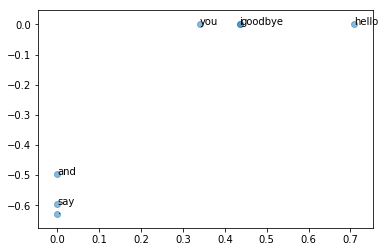

In [9]:
# 플롯
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

### 2.4.4 PTB 데이터셋

**펜 트리뱅크**(PTB, Penn Treebank) 데이터셋이며, PTB 말뭉치는 주어진 기법의 품질을 측정하는 벤치마크로 자주 이용된다.

In [1]:
# chap02/show_ptb.py
import sys
sys.path.append('..')
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')

print('말뭉치 크기:', len(corpus))
print('corpus[:30]:', corpus[:30])
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])

말뭉치 크기: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


### 2.4.5 PTB 데이터셋 평가

In [2]:
# chap02/count_method_big.py
import sys
sys.path.append('..')
import numpy as np
from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb

window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('Create Co-occurrence Matrix...')
C = create_co_matrix(corpus, vocab_size, window_size)

Create Co-occurrence Matrix...


In [3]:
print('PPMI 계산...')
W = ppmi(C, verbose=True)

PPMI 계산...
1.00 완료
2.00 완료
3.00 완료
4.00 완료
5.00 완료
6.00 완료
7.00 완료
8.00 완료
9.00 완료
10.00 완료
11.00 완료
12.00 완료
13.00 완료
14.00 완료
15.00 완료
16.00 완료
17.00 완료
18.00 완료
19.00 완료
20.00 완료
21.00 완료
22.00 완료
23.00 완료
24.00 완료
25.00 완료
26.00 완료
27.00 완료
28.00 완료
29.00 완료
30.00 완료
31.00 완료
32.00 완료
33.00 완료
34.00 완료
35.00 완료
36.00 완료
37.00 완료
38.00 완료
39.00 완료
40.00 완료
41.00 완료
42.00 완료
43.00 완료
44.00 완료
45.00 완료
46.00 완료
47.00 완료
48.00 완료
49.00 완료
50.00 완료
51.00 완료
52.00 완료
53.00 완료
54.00 완료
55.00 완료
56.00 완료
57.00 완료
58.00 완료
59.00 완료
60.00 완료
61.00 완료
62.00 완료
63.00 완료
64.00 완료
65.00 완료
66.00 완료
67.00 완료
68.00 완료
69.00 완료
70.00 완료
71.00 완료
72.00 완료
73.00 완료
74.00 완료
75.00 완료
76.00 완료
77.00 완료
78.00 완료
79.00 완료
80.00 완료
81.00 완료
82.00 완료
83.00 완료
84.00 완료
85.00 완료
86.00 완료
87.00 완료
88.00 완료
89.00 완료
90.00 완료
91.00 완료
92.00 완료
93.00 완료
94.00 완료
95.00 완료
96.00 완료
97.00 완료
98.00 완료
99.00 완료
100.00 완료


In [6]:
try:
    # truncated SVD
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,
                             random_state=None)
except:
    # SVD
    U, S, V = np.linalg.svd(W)

    
word_vecs = U[:, :wordvec_size]
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)


[query] you
 i: 0.6474241018295288
 we: 0.6223806738853455
 do: 0.5163971185684204
 've: 0.49530309438705444
 'll: 0.4937693476676941

[query] year
 earlier: 0.6766989827156067
 quarter: 0.6463431119918823
 next: 0.6242960095405579
 month: 0.6221592426300049
 last: 0.5859693288803101

[query] car
 luxury: 0.661283016204834
 auto: 0.6432934403419495
 truck: 0.5961803793907166
 cars: 0.5737640261650085
 corsica: 0.5673944354057312

[query] toyota
 motor: 0.7801448106765747
 nissan: 0.7088394165039062
 motors: 0.691170871257782
 honda: 0.6479698419570923
 mazda: 0.5932565331459045


## 2.5 정리

- 시소러스 기반 기법은 시소러스를 작성하는 데 엄청난 인적 자원이 들고, 새로운 단어에 대응하기 어려운 문제가 있다.

- 현재는 말뭉치(corpus)를 이용해 단어를 벡터화하는 방식이 주로 사용된다.

- 최근의 단어 벡터화 기법들은 '단어의 의미는 주변 단어에 의해 형성된다'는 **분포 가설**에 기초한다.

- 통계 기반 기법은 말뭉치 안의 각 단어에 대해서 그 단어의 주변 단어의 빈도를 집계한다 -> Co-occurrence Matrix

- 동시발생 행렬을 PPMI 행렬로 변환하고 다시 차원을 축소(SVD)함으로써, '희소벡터'를 '밀집벡터'로 변환할 수 있다.